**Q1:
Step 01**

In [10]:
from google.colab import files

# Upload the image
uploaded = files.upload()


Saving Question 1.jpg to Question 1 (1).jpg


Load and Displaying the image

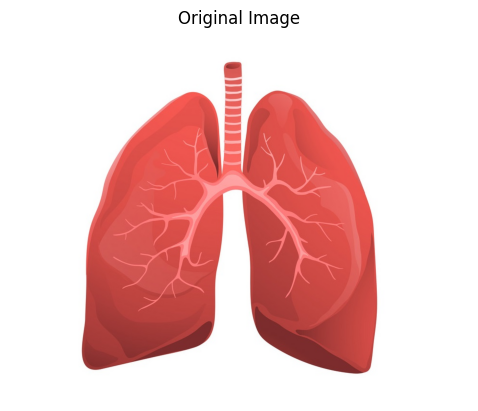

In [11]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]

# Load the image using OpenCV
image = cv2.imread(filename)

# Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()


Resizing the image

In [20]:
# Define the desired size
fixed_size = (300, 200)

# Resize the image
resized_image = cv2.resize(image, fixed_size)


Displaying resized image

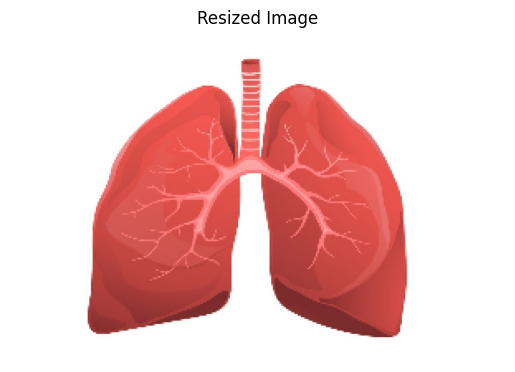

In [21]:
# Display the resized image
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')
plt.show()


Saving the resized image

In [22]:
# Save the resized image
cv2.imwrite('resized_image.jpg', resized_image)


True

**Step 2**

Loading reszed image

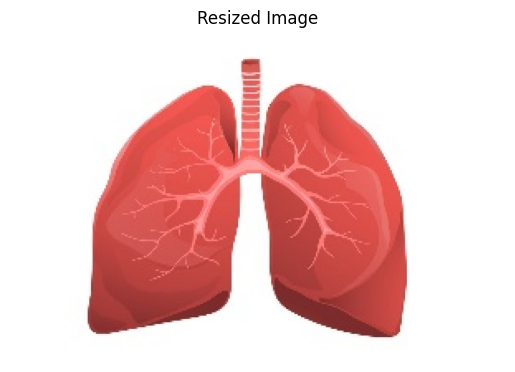

In [23]:
import cv2
from matplotlib import pyplot as plt

# Load the resized image
resized_image = cv2.imread('resized_image.jpg')
resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Display the resized image
plt.imshow(resized_image)
plt.title('Resized Image')
plt.axis('off')
plt.show()


Salt and Pepper Noise (for grayscale images):

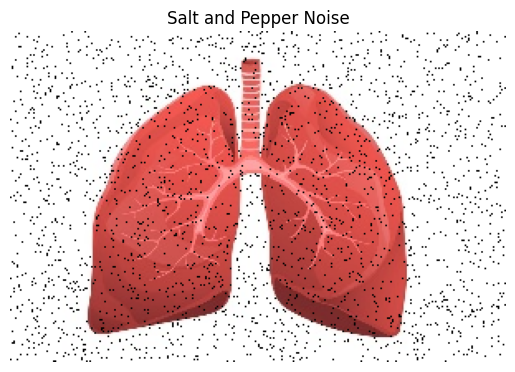

In [29]:
import numpy as np

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)

    # Add salt noise
    salt_pixels = np.random.random(image.shape[:2])
    noisy_image[salt_pixels < salt_prob] = 1.0

    # Add pepper noise
    pepper_pixels = np.random.random(image.shape[:2])
    noisy_image[pepper_pixels < pepper_prob] = 0.0

    return noisy_image

# Specify probabilities for salt and pepper noise
salt_prob = 0.02
pepper_prob = 0.02

# Apply salt and pepper noise
noisy_image_salt_pepper = add_salt_and_pepper_noise(resized_image, salt_prob, pepper_prob)

# Display the image with salt and pepper noise
plt.imshow(noisy_image_salt_pepper)
plt.title('Salt and Pepper Noise')
plt.axis('off')
plt.show()


Speckle Noise (for grayscale images):

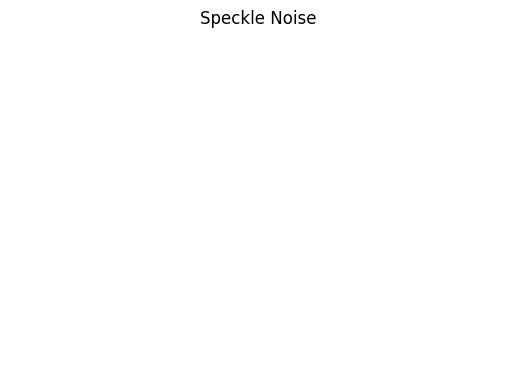

In [30]:
def add_speckle_noise(image, variance):
    row, col, ch = image.shape
    gauss = np.random.randn(row, col, ch)
    noisy = image + image * gauss * variance
    return noisy

# Specify variance for speckle noise
speckle_variance = 0.05

# Apply speckle noise
noisy_image_speckle = add_speckle_noise(resized_image, speckle_variance)

# Display the image with speckle noise
plt.imshow(np.clip(noisy_image_speckle, 0, 1))  # Ensure values are in the valid range [0, 1]
plt.title('Speckle Noise')
plt.axis('off')
plt.show()


Random Noise (for grayscale images):

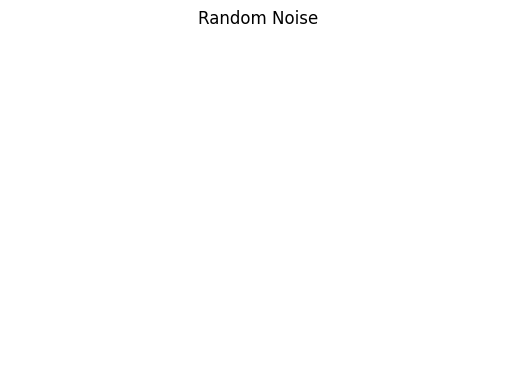

In [31]:
def add_random_noise(image, noise_level):
    noisy_image = image + noise_level * np.random.normal(size=image.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    return noisy_image

# Specify noise level for random noise
random_noise_level = 0.05

# Apply random noise
noisy_image_random = add_random_noise(resized_image, random_noise_level)

# Display the image with random noise
plt.imshow(noisy_image_random)
plt.title('Random Noise')
plt.axis('off')
plt.show()


Gaussian Noise (for grayscale images):

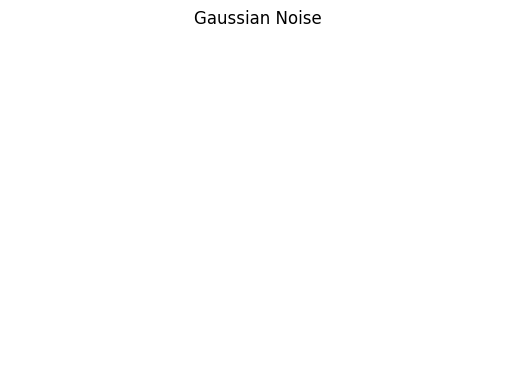

In [32]:
def add_gaussian_noise(image, mean, sigma):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = image + gauss

    # Clip values to the valid range [0, 1]
    noisy = np.clip(noisy, 0, 1)

    return noisy

# Specify mean and standard deviation for Gaussian noise
gaussian_mean = 0
gaussian_sigma = 0.1

# Apply Gaussian noise
noisy_image_gaussian = add_gaussian_noise(resized_image, gaussian_mean, gaussian_sigma)

# Display the image with Gaussian noise
plt.imshow(noisy_image_gaussian)
plt.title('Gaussian Noise')
plt.axis('off')
plt.show()



Saving noisy image

In [34]:
# Assuming noisy_image_speckle is the image with speckle noise
noisy_image_speckle_uint8 = (noisy_image_speckle * 255).astype(np.uint8)

# Save the image
cv2.imwrite('noisy_image_speckle.jpg', cv2.cvtColor(noisy_image_speckle_uint8, cv2.COLOR_RGB2BGR))



True

Step3

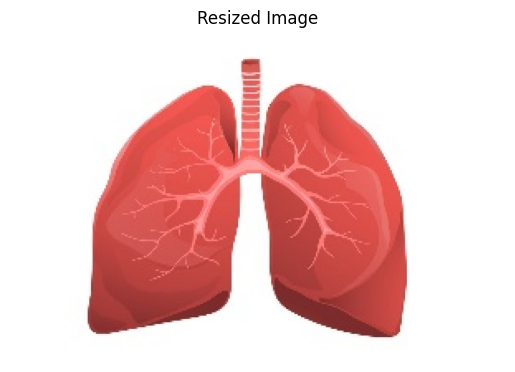

In [35]:
import cv2
from matplotlib import pyplot as plt

# Load the resized image
resized_image = cv2.imread('resized_image.jpg')
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Display the resized image
plt.imshow(resized_image_rgb)
plt.title('Resized Image')
plt.axis('off')
plt.show()


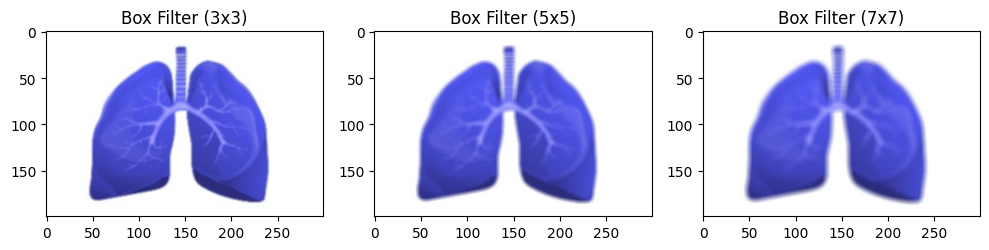

In [36]:
# Apply box filter with different kernel sizes
box_filtered_3x3 = cv2.boxFilter(resized_image, -1, (3, 3))
box_filtered_5x5 = cv2.boxFilter(resized_image, -1, (5, 5))
box_filtered_7x7 = cv2.boxFilter(resized_image, -1, (7, 7))

# Display the box-filtered images
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(box_filtered_3x3), plt.title('Box Filter (3x3)')
plt.subplot(132), plt.imshow(box_filtered_5x5), plt.title('Box Filter (5x5)')
plt.subplot(133), plt.imshow(box_filtered_7x7), plt.title('Box Filter (7x7)')
plt.tight_layout()
plt.show()


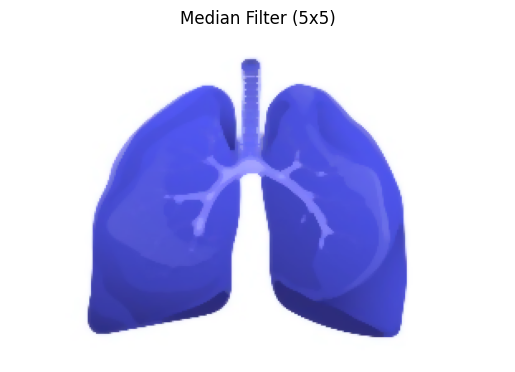

In [37]:
# Apply median filter
median_filtered = cv2.medianBlur(resized_image, 5)  # Kernel size is 5x5

# Display the median-filtered image
plt.imshow(median_filtered)
plt.title('Median Filter (5x5)')
plt.axis('off')
plt.show()


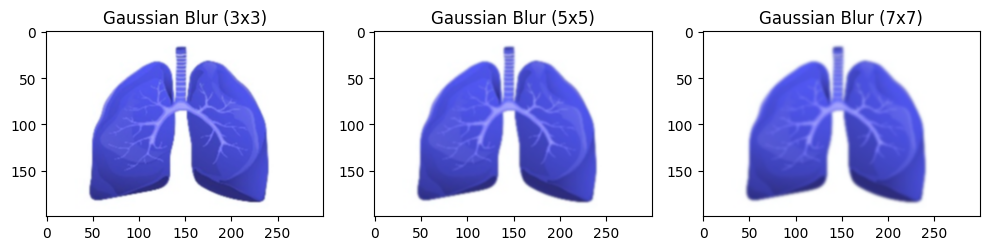

In [38]:
# Apply Gaussian blur with different kernel sizes
gaussian_blur_3x3 = cv2.GaussianBlur(resized_image, (3, 3), 0)
gaussian_blur_5x5 = cv2.GaussianBlur(resized_image, (5, 5), 0)
gaussian_blur_7x7 = cv2.GaussianBlur(resized_image, (7, 7), 0)

# Display the Gaussian-blurred images
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(gaussian_blur_3x3), plt.title('Gaussian Blur (3x3)')
plt.subplot(132), plt.imshow(gaussian_blur_5x5), plt.title('Gaussian Blur (5x5)')
plt.subplot(133), plt.imshow(gaussian_blur_7x7), plt.title('Gaussian Blur (7x7)')
plt.tight_layout()
plt.show()


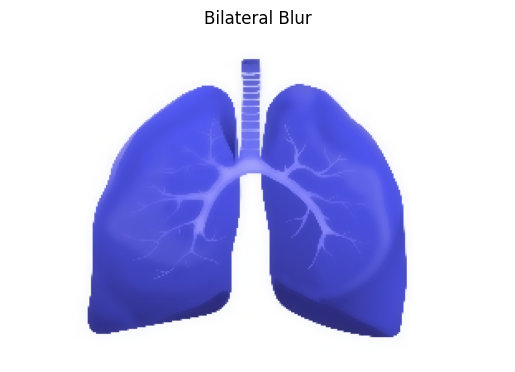

In [39]:
# Apply bilateral blur
bilateral_blur = cv2.bilateralFilter(resized_image, 9, 75, 75)

# Display the bilateral-blurred image
plt.imshow(bilateral_blur)
plt.title('Bilateral Blur')
plt.axis('off')
plt.show()


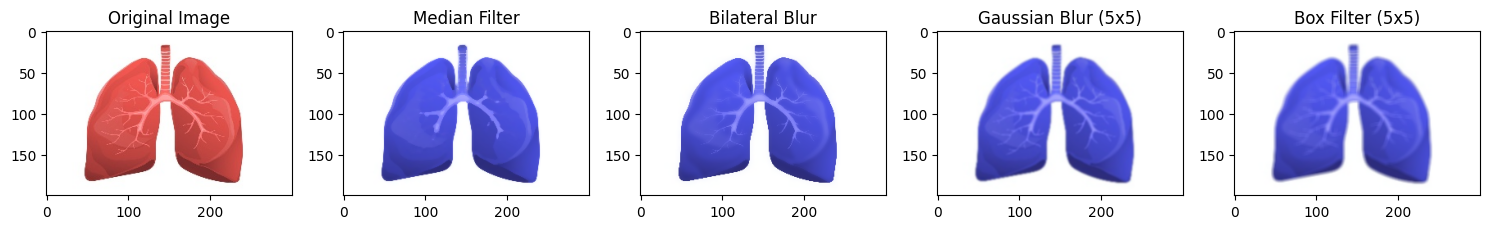

In [40]:
# Display the original and denoised images side by side
plt.figure(figsize=(15, 5))
plt.subplot(151), plt.imshow(resized_image_rgb), plt.title('Original Image')
plt.subplot(152), plt.imshow(median_filtered), plt.title('Median Filter')
plt.subplot(153), plt.imshow(bilateral_blur), plt.title('Bilateral Blur')
plt.subplot(154), plt.imshow(gaussian_blur_5x5), plt.title('Gaussian Blur (5x5)')
plt.subplot(155), plt.imshow(box_filtered_5x5), plt.title('Box Filter (5x5)')
plt.tight_layout()
plt.show()


Question2

In [54]:
from google.colab import files

# Upload the image
uploaded = files.upload()

Saving Question 2.jpg to Question 2 (2).jpg


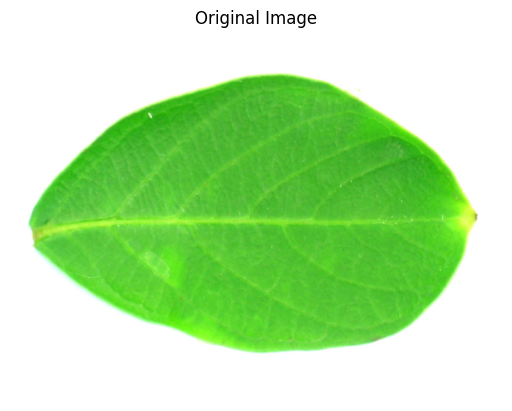

In [55]:
import cv2
from matplotlib import pyplot as plt

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]

# Load the image using OpenCV
image = cv2.imread(filename)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


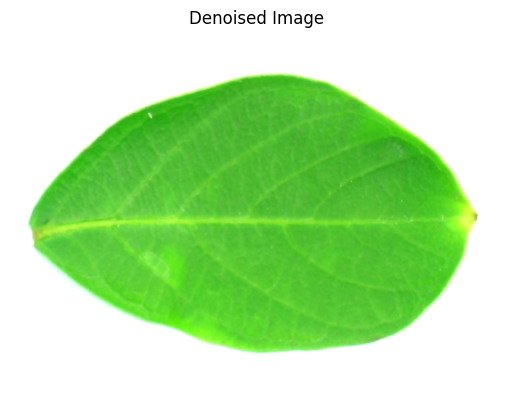

In [56]:
# Apply bilateral filter for denoising
denoised_image = cv2.bilateralFilter(image, 9, 75, 75)

# Display the denoised image
denoised_image_rgb = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)
plt.imshow(denoised_image_rgb)
plt.title('Denoised Image')
plt.axis('off')
plt.show()




In [57]:
cv2.imwrite('denoised_image.jpg', cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))


True

In [ ]:
Question3

In [59]:
from google.colab import files

# Upload the image
uploaded = files.upload()
uploaded = files.upload()

Saving Question 3 (1).png to Question 3 (1) (2).png


Saving Question 3 (2).png to Question 3 (2) (2).png


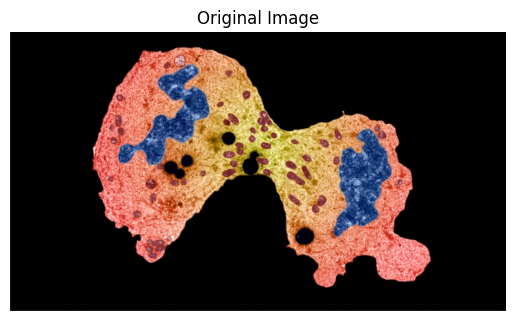

In [60]:
import cv2
from matplotlib import pyplot as plt

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]

# Load the image using OpenCV
image = cv2.imread(filename)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()



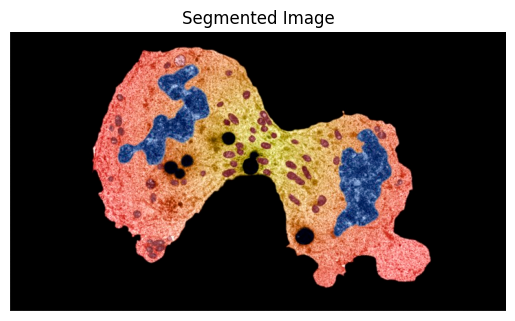

In [62]:
# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for segmentation based on color
lower_bound = (0, 0, 0)  # Adjust these values based on the color you want to segment
upper_bound = (255, 255, 255)

# Create a binary mask by thresholding the image
mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

# Apply the mask to the original image
segmented_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Display the segmented image
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')
plt.show()
